## Clustering

In this notebook we will look into using KMeans and DBSCAN to cluster Starbucks locations geographically. We use scikit-learn, as well as `matplotlib` for graphing.

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

This function will be used to visualise our clustering results.

In [14]:
def graphClusters(all_data, labels, centers):
    # open a color map (cmap) which is a collection of colors which you can fetch by index (i.e. an integer)
    cmap = cm.get_cmap(name='tab10')
    
    # add the color as a new column in the dataframe and add the cluster labels
    all_data['color'] = labels
    
    # add the centroids (in case of K-means) to the plot by adding their coordinates  
    # example pyplot use: plt.plot(x, y, 'bo', linestyle='dashed')
    # example pyplot use: plt.plot(x, y,  color='blue', marker='o', linestyle='dashed')
    # more here: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
    
    which_centroid = 0
    if centers:
        for center in centers:     
            plt.plot(center[0],center[1],'ro',label='centroid_'+str(which_centroid),
                     markersize=10,color=cmap(which_centroid))
            which_centroid += 1
    
    # add all the data points and use their label number to fetch a certain color
    # index is    
    for ind,row in all_data.iterrows():
        plt.plot(row['Longitude'],row['Latitude'],'ro',color=cmap(int(row['color'])),markersize=2)
        
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

First, let's discover the data.

In [57]:
# Read csv with pandas, index indicates whether the first column is an index
data = pd.read_csv("starbucks_locations.csv", index_col=0)

print(data.head())

data = data.dropna()

# Reduce data for computability. just keep first 2000
# data = data[:200]

# or reduce data to just some part of the planet
data = data[(data["Longitude"].between(49, 51)) & (data["Latitude"].between(26, 27))]
    
data

              Longitude  Latitude
Store Number                     
47370-257954       1.53     42.51
22331-212325      55.47     25.42
47089-256771      55.47     25.39
22126-218024      54.38     24.48
17127-178586      54.54     24.51


,Longitude,Latitude
Store Number,,
47088-256773,50.52,26.21
21603-213405,50.59,26.23
17255-179926,50.60,26.20
17189-179925,50.58,26.22
15439-161444,50.57,26.21
47377-258065,50.55,26.22
26955-246149,50.59,26.23
21148-209545,50.60,26.22
34324-95973,50.61,26.21


We can use scikit-learn for both K-means and DBSCAN.

### K-means

Start K-means: 
Cluster centroids: [[50.095      26.4225    ]
 [50.58666667 26.22166667]
 [50.17333333 26.3       ]
 [49.8        26.46      ]
 [49.98       26.25      ]
 [50.58       26.14      ]
 [49.99       26.35      ]
 [50.62       26.26      ]
 [50.54166667 26.225     ]
 [50.21333333 26.30333333]]


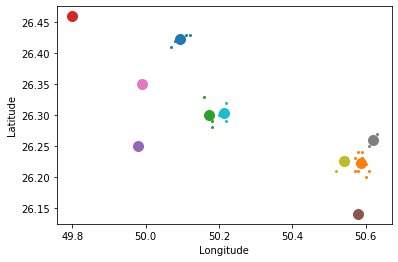

In [58]:
# K-means with 10 neighbours and 500 iterations
kmeans = KMeans(10, max_iter=500)

print('Start K-means: ')
kmeans.fit(data)
print("Cluster centroids: " +str(kmeans.cluster_centers_))

graphClusters(data,kmeans.labels_,list(kmeans.cluster_centers_))

### DBSCAN

Start DBSCAN: 
Labels: {-1}


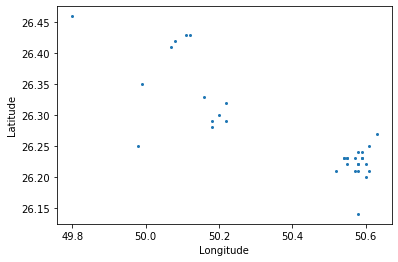

In [59]:
dbscan = DBSCAN(eps=20,min_samples=100)

print('Start DBSCAN: ')
dbscan.fit(data)
print("Labels: "+str(set(dbscan.labels_)))

graphClusters(data,dbscan.labels_,[])